<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Stock-Price-Prediction/blob/main/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
!pip install yfinance
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
data = yf.Ticker('WIPRO.NS')

In [ ]:
data = data.history(period='max')

In [ ]:
data.shape

(6854, 7)

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,0.910127,0.910127,0.910127,0.910127,19999,0.0,0.0
1996-01-02 00:00:00+05:30,0.839340,0.839340,0.839340,0.839340,39999,0.0,0.0
1996-01-03 00:00:00+05:30,0.869678,0.869678,0.869678,0.869678,19999,0.0,0.0
1996-01-04 00:00:00+05:30,0.869678,0.869678,0.869678,0.869678,119999,0.0,0.0
1996-01-05 00:00:00+05:30,0.869678,0.869678,0.869678,0.869678,0,0.0,0.0


In [ ]:
data = data[~data['Open'].isnull()]

In [ ]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
data.isna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-02 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-03 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-04 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-05 00:00:00+05:30,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2023-03-23 00:00:00+05:30,False,False,False,False,False,False,False
2023-03-24 00:00:00+05:30,False,False,False,False,False,False,False
2023-03-27 00:00:00+05:30,False,False,False,False,False,False,False


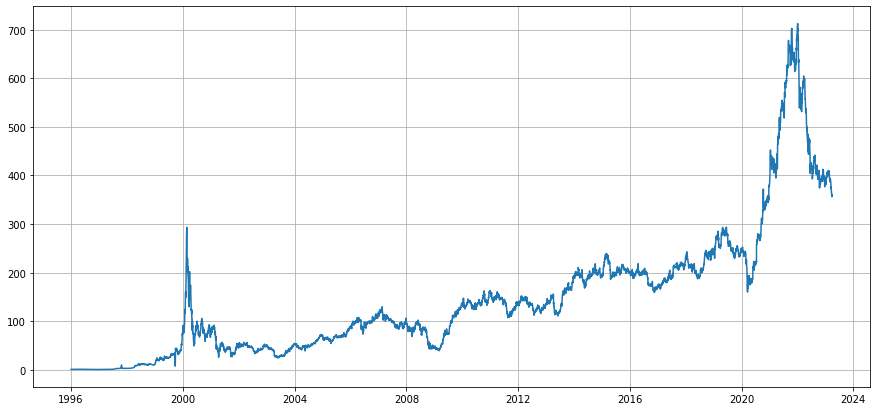

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Close'])

plt.grid(True)
plt.show()

In [ ]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(data['Close'], 24) # prediction for next hour, using the last observed day's data.  (past 24 hours)

378.7229181925456

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

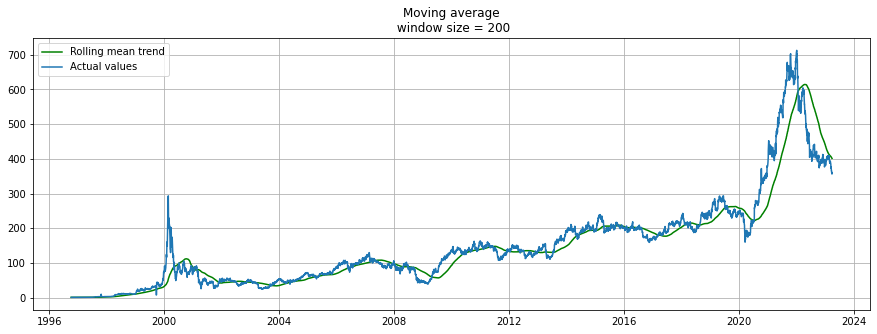

In [ ]:
plotMovingAverage(data['Close'], 200) 

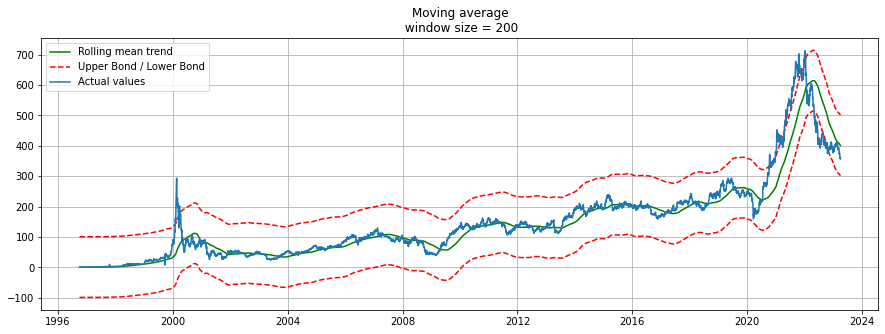

In [ ]:
plotMovingAverage(data['Close'], 200, plot_intervals=True)

In [ ]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [ ]:
weighted_average(data['Close'], [0.6, 0.3, 0.1])

358.4149963378906

In [ ]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

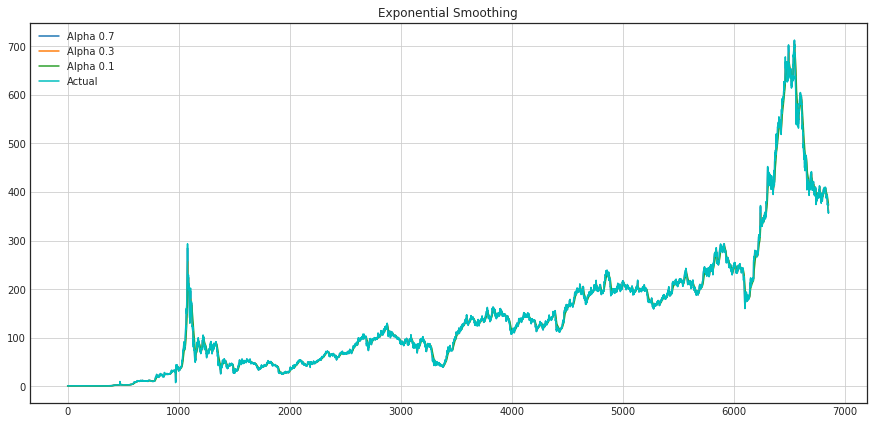

In [ ]:
plotExponentialSmoothing(data['Close'], [0.7,0.3, 0.1])

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

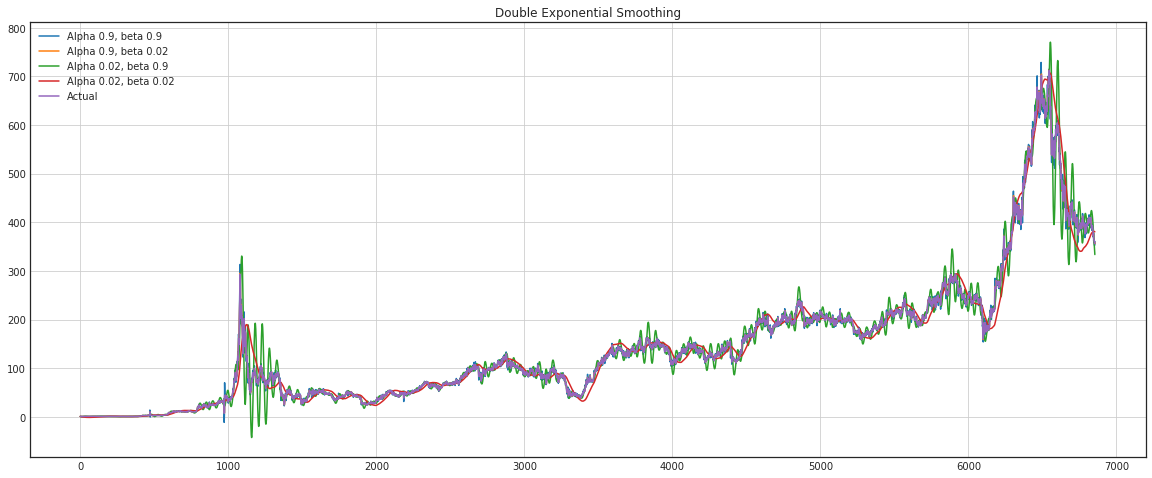

In [ ]:
plotDoubleExponentialSmoothing(data['Close'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

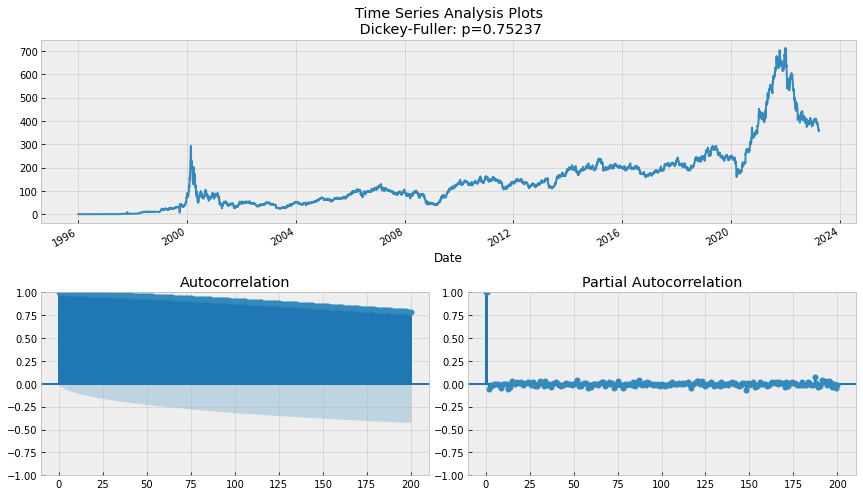

In [ ]:
tsplot(data['Close'], lags=200)

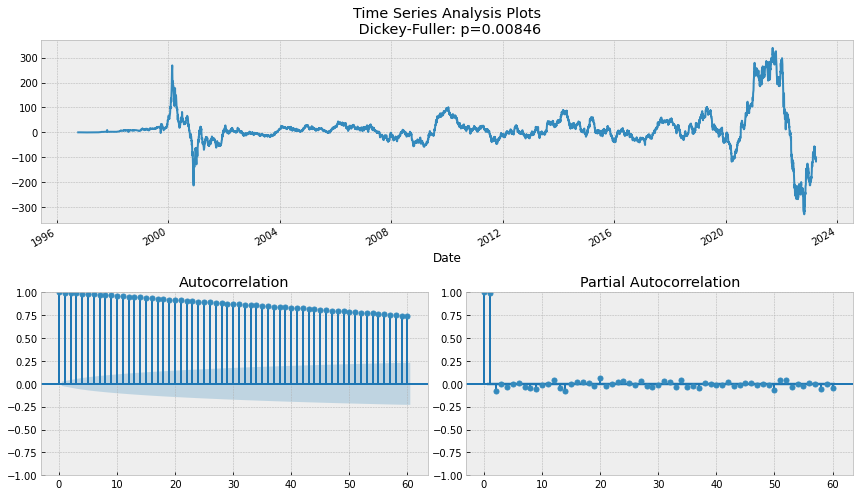

In [ ]:
cls_diff = data['Close'] - data['Close'].shift(200)
tsplot(cls_diff[200:], lags=60)

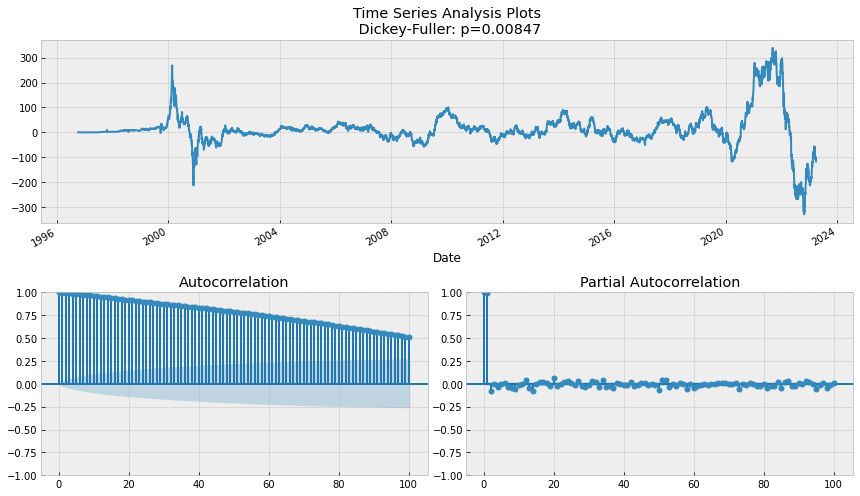

In [ ]:
cls_diff = data['Close'] - data['Close'].shift(200)
tsplot(cls_diff[200+1:], lags=100)

#Applying Machine Learning Model Using Sklearn 

In [2]:
import yfinance as yf

In [339]:
df = yf.Ticker('JINDALSTEL.NS')
df = df.history(period='max')
df.shape

(5904, 7)

In [340]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-09-22 00:00:00+05:30,2.151111,2.151111,2.100990,2.151111,288000,0.0,0.0
1999-09-23 00:00:00+05:30,2.155917,2.176515,2.087258,2.115409,726000,0.0,0.0
1999-09-24 00:00:00+05:30,2.100990,2.265774,2.100990,2.249295,720000,0.0,0.0
1999-09-27 00:00:00+05:30,2.265774,2.368763,2.213592,2.241056,1038000,0.0,0.0
1999-09-28 00:00:00+05:30,2.164156,2.208785,2.102362,2.120214,1062000,0.0,0.0


In [341]:
df.reset_index(inplace=True)

In [342]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [343]:
df.tail()

,Date,Open,High,Low,Close,Volume
5899,2023-04-28 00:00:00+05:30,581.849976,585.200012,578.000000,582.849976,1733781
5900,2023-05-02 00:00:00+05:30,587.000000,597.349976,582.400024,592.750000,2060182
5901,2023-05-03 00:00:00+05:30,594.000000,594.799988,580.400024,588.599976,1376005
5902,2023-05-04 00:00:00+05:30,589.049988,600.650024,588.650024,595.049988,1392236
5903,2023-05-05 00:00:00+05:30,594.000000,596.250000,582.000000,583.099976,1510806


#Feature Engineering

In [344]:
df.iloc[-1:,2:]=0

In [345]:
df.iloc[-1:,:]

,Date,Open,High,Low,Close,Volume
5903,2023-05-05 00:00:00+05:30,594.0,0.0,0.0,0.0,0


In [346]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year
df['day'] = pd.to_datetime(df['Date']).dt.day

In [347]:
df['|H-Cp|'] = abs(df['High'].iloc[1:]-df['Close'])
df['H-L'] = df['High']-df['Low']
df['|L-Cp|'] = abs(df['Low'].iloc[1:]-df['Close'])

In [348]:
df['TR'] = df[['|H-Cp|', 'H-L', '|L-Cp|']].max(axis=1)

In [349]:
df.tail()

,Date,Open,High,Low,Close,Volume,month,year,day,|H-Cp|,H-L,|L-Cp|,TR
5899,2023-04-28 00:00:00+05:30,581.849976,585.200012,578.000000,582.849976,1733781,4,2023,28,2.350037,7.200012,4.849976,7.200012
5900,2023-05-02 00:00:00+05:30,587.000000,597.349976,582.400024,592.750000,2060182,5,2023,2,4.599976,14.949951,10.349976,14.949951
5901,2023-05-03 00:00:00+05:30,594.000000,594.799988,580.400024,588.599976,1376005,5,2023,3,6.200012,14.399963,8.199951,14.399963
5902,2023-05-04 00:00:00+05:30,589.049988,600.650024,588.650024,595.049988,1392236,5,2023,4,5.600037,12.000000,6.399963,12.000000
5903,2023-05-05 00:00:00+05:30,594.000000,0.000000,0.000000,0.000000,0,5,2023,5,0.000000,0.000000,0.000000,0.000000


In [350]:
df['ATR'] = df['TR'].rolling(14).mean()

In [351]:
for i in range(14,200,14):
  df[f'high_Ma_{i}'] = df['High'].rolling(i).mean() 
  df[f'high_std_{i}'] = df['High'].rolling(i).std() 
  df[f'low_Ma_{i}'] = df['Low'].rolling(i).mean() 
  df[f'low_std_{i}'] = df['Low'].rolling(i).std() 
  df[f'vol_Ma_{i}'] = df['Volume'].rolling(i).mean() 
  df[f'vol_std_{i}'] = df['Volume'].rolling(i).std() 
  df[f'close_Ma_{i}'] = df['Close'].rolling(i).mean() 
  df[f'close_std_{i}'] = df['Close'].rolling(i).std()
  break

In [352]:
df.tail()

,Date,Open,High,Low,Close,Volume,month,year,day,|H-Cp|,...,TR,ATR,high_Ma_14,high_std_14,low_Ma_14,low_std_14,vol_Ma_14,vol_std_14,close_Ma_14,close_std_14
5899,2023-04-28 00:00:00+05:30,581.849976,585.200012,578.000000,582.849976,1733781,4,2023,28,2.350037,...,7.200012,11.300014,575.275007,10.693434,563.974993,9.218274,1.907585e+06,1.170212e+06,570.103572,10.483339
5900,2023-05-02 00:00:00+05:30,587.000000,597.349976,582.400024,592.750000,2060182,5,2023,2,4.599976,...,14.949951,11.621438,578.050005,11.040620,566.428567,9.224929,1.751873e+06,9.625742e+05,573.192858,10.315959
5901,2023-05-03 00:00:00+05:30,594.000000,594.799988,580.400024,588.599976,1376005,5,2023,3,6.200012,...,14.399963,11.860718,580.257145,11.082828,568.396428,9.042208,1.713368e+06,9.663182e+05,575.028569,10.625464
5902,2023-05-04 00:00:00+05:30,589.049988,600.650024,588.650024,595.049988,1392236,5,2023,4,5.600037,...,12.000000,12.000000,582.614288,11.688003,570.614288,9.952503,1.707644e+06,9.680912e+05,577.582140,10.848201
5903,2023-05-05 00:00:00+05:30,594.000000,0.000000,0.000000,0.000000,0,5,2023,5,0.000000,...,0.000000,11.592856,542.521432,156.465015,530.928576,153.074526,1.607970e+06,1.069259e+06,537.553567,155.019546


In [353]:
df.dropna(inplace=True)

In [354]:
df.shape

(5891, 22)

In [355]:
df.tail()

,Date,Open,High,Low,Close,Volume,month,year,day,|H-Cp|,...,TR,ATR,high_Ma_14,high_std_14,low_Ma_14,low_std_14,vol_Ma_14,vol_std_14,close_Ma_14,close_std_14
5899,2023-04-28 00:00:00+05:30,581.849976,585.200012,578.000000,582.849976,1733781,4,2023,28,2.350037,...,7.200012,11.300014,575.275007,10.693434,563.974993,9.218274,1.907585e+06,1.170212e+06,570.103572,10.483339
5900,2023-05-02 00:00:00+05:30,587.000000,597.349976,582.400024,592.750000,2060182,5,2023,2,4.599976,...,14.949951,11.621438,578.050005,11.040620,566.428567,9.224929,1.751873e+06,9.625742e+05,573.192858,10.315959
5901,2023-05-03 00:00:00+05:30,594.000000,594.799988,580.400024,588.599976,1376005,5,2023,3,6.200012,...,14.399963,11.860718,580.257145,11.082828,568.396428,9.042208,1.713368e+06,9.663182e+05,575.028569,10.625464
5902,2023-05-04 00:00:00+05:30,589.049988,600.650024,588.650024,595.049988,1392236,5,2023,4,5.600037,...,12.000000,12.000000,582.614288,11.688003,570.614288,9.952503,1.707644e+06,9.680912e+05,577.582140,10.848201
5903,2023-05-05 00:00:00+05:30,594.000000,0.000000,0.000000,0.000000,0,5,2023,5,0.000000,...,0.000000,11.592856,542.521432,156.465015,530.928576,153.074526,1.607970e+06,1.069259e+06,537.553567,155.019546


In [356]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [357]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','High','Low','Close','Volume','|H-Cp|','H-L','|L-Cp|','TR']]])

,variables,VIF
0,Open,6.953512e+02
1,month,4.605401e+00
2,year,1.049177e+01
3,day,4.257643e+00
4,ATR,inf
5,high_Ma_14,inf
6,high_std_14,8.312876e+01
7,low_Ma_14,inf
8,low_std_14,7.204136e+01
9,vol_Ma_14,7.557547e+00


In [358]:
#Splitiing the data

train_x = df.iloc[0:-300]
x_train = train_x.drop(columns=['Date','High','Low','Close','Volume','|H-Cp|','H-L','|L-Cp|','TR'])
y_train = df.iloc[:-300]['Close']

test_x = df.iloc[-300:-1]
x_test = test_x.drop(columns=['Date','High','Low','Close','Volume','|H-Cp|','H-L','|L-Cp|','TR'])
y_test = df.iloc[-300:-1]['Close']

In [369]:
x_train.head()

,Open,month,year,day,ATR,high_Ma_14,high_std_14,low_Ma_14,low_std_14,vol_Ma_14,vol_std_14,close_Ma_14,close_std_14
13,3.034763,10,1999,11,0.102843,2.406477,0.278190,2.303634,0.267902,9.947143e+05,8.949556e+05,2.372637,0.297093
14,3.309402,10,1999,12,0.109709,2.491811,0.363870,2.382103,0.351745,1.051714e+06,8.715898e+05,2.457972,0.386646
15,3.610819,10,1999,13,0.116231,2.594458,0.458478,2.478226,0.438222,1.035857e+06,8.799509e+05,2.564983,0.480478
16,3.902624,10,1999,14,0.104461,2.711376,0.564632,2.606914,0.565090,9.964286e+05,9.071393e+05,2.683078,0.588057
17,4.215025,10,1999,15,0.121773,2.843251,0.681888,2.721478,0.637198,1.199571e+06,1.191146e+06,2.811570,0.674257


In [359]:
#importing the 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100],'l1_ratio':[0.5,0.8,1.0,1.2,1.5,1.8]}
model = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error')
model.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100],
                         'l1_ratio': [0.5, 0.8, 1.0, 1.2, 1.5, 1.8]},
             scoring='neg_mean_squared_error')

In [360]:
model.best_params_

{'alpha': 1, 'l1_ratio': 0.5}

In [361]:
y_pred_train_r = model.predict(x_train)
y_pred_test_r = model.predict(x_test)

In [362]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",model.score(x_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: -56.94046571119254
MSE : 56.94046571119254
RMSE : 7.545890650625182
MAE : 4.127366552303297
R2 : 0.998583528766244
Adjusted R2 : 0.9985189177976868


In [363]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 119.30210942172674
RMSE : 10.92255049984786
MAE : 8.467410741746047
R2 : 0.9837699754033097
Adjusted R2 : 0.9830296584918817


In [364]:

pred_df = df.tail(1).drop(columns=['Date','High','Low','Close','Volume','|H-Cp|','H-L','|L-Cp|','TR'])

In [365]:
pred_df

,Open,month,year,day,ATR,high_Ma_14,high_std_14,low_Ma_14,low_std_14,vol_Ma_14,vol_std_14,close_Ma_14,close_std_14
5903,594.0,5,2023,5,11.592856,542.521432,156.465015,530.928576,153.074526,1607969.5,1.069259e+06,537.553567,155.019546


In [366]:
model.predict(pred_df)

array([593.19091977])